#### GD604-Assessment 2

In [5]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                   
warnings.filterwarnings('ignore')

#### Task A –Data Transformation:  

In [6]:
# a. Load the dataset into a DataFrame. 
sales = pd.read_csv('Sales_Sample_Public_Dataset.csv', encoding='latin1')

In [7]:
# b. Show the first few rows of the loaded dataset.
print("Displaying the first few rows of the dataset:")
sales.head()

Displaying the first few rows of the dataset:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/07/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/01/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
sales.shape

(2823, 25)

In [9]:
# c. Apply three (3) operations to handle missing values in a dataset. 
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
# 2. finding the cities which does not have postal codes
missing_postalcode = sales[sales['POSTALCODE'].isna()]
unique_cities = missing_postalcode['CITY'].drop_duplicates()
print("Cities which does not have postal codes:\n",unique_cities)

Cities which does not have postal codes:
 4      San Francisco
115      Los Angeles
Name: CITY, dtype: object


In [11]:
# Postal codes collected from google 'San Francisco':415628, 'Los Angeles':90048

# Assigning postal code
city_post = {'San Francisco':415628, 'Los Angeles':90048}

# data mappping
mapping = sales['CITY'].map(city_post)

# filling missing data by using fillna function
sales['POSTALCODE'] = sales['POSTALCODE'].fillna(mapping)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [13]:
# 3. found ORDERDATE in object format
# changing object format to date format
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [15]:
duplicates = sales[sales.duplicated()]
duplicates

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [16]:
# 1. dropping unwanted columns()
sales = sales.drop(['PRODUCTCODE', 
                    'PHONE', 'ADDRESSLINE1', 
                    'ADDRESSLINE2','CITY', 'POSTALCODE', 
                    'STATE','TERRITORY', 'CONTACTLASTNAME', 
                    'CONTACTFIRSTNAME'], axis=1)

In [17]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium


In [18]:
# d. Choose a column and perform the sorting technique.

# find the top 5 shipped orders by sales figure.
shipped_orders = sales[sales['STATUS'] == 'Shipped']
shipped_sales = shipped_orders.sort_values(by ='SALES', ascending= False)
shipped_sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
744,10322,50,100.0,6,12536.5,2004-11-04,Shipped,4,11,2004,Vintage Cars,127,Online Diecast Creations Co.,USA,Large
1062,10412,60,100.0,9,11887.8,2005-05-03,Shipped,2,5,2005,Classic Cars,169,Euro Shopping Channel,Spain,Large
104,10403,66,100.0,9,11886.6,2005-04-08,Shipped,2,4,2005,Motorcycles,193,"UK Collectables, Ltd.",UK,Large
1995,10405,76,100.0,3,11739.7,2005-04-14,Shipped,2,4,2005,Classic Cars,140,Mini Caravy,France,Large
44,10312,48,100.0,3,11623.7,2004-10-21,Shipped,4,10,2004,Classic Cars,214,Mini Gifts Distributors Ltd.,USA,Large


In [19]:
# d.Choose a column and perform the sorting technique. 
# find the top 5 cancelled orders by sales figure.
cancelled_orders = sales[sales['STATUS'] == 'Cancelled']
cancelled_sales = cancelled_orders.sort_values(by='SALES', ascending=False)
cancelled_sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
1602,10248,48,100.0,10,6960.48,2004-05-07,Cancelled,2,5,2004,Ships,122,Land of Toys Inc.,USA,Medium
1037,10253,40,100.0,6,6773.60,2004-06-01,Cancelled,2,6,2004,Classic Cars,169,"UK Collectables, Ltd.",UK,Medium
564,10262,49,100.0,9,6567.96,2004-06-24,Cancelled,2,6,2004,Planes,157,Euro Shopping Channel,Spain,Medium
111,10167,44,100.0,9,5924.16,2003-10-23,Cancelled,4,10,2003,Classic Cars,136,Scandinavian Gift Ideas,Sweden,Medium
557,10167,43,100.0,1,5763.72,2003-10-23,Cancelled,4,10,2003,Planes,157,Scandinavian Gift Ideas,Sweden,Medium


In [20]:
# find the top 10 order by sales figure.
top_sales = sales.sort_values(by= 'SALES', ascending=False)
top_10 = top_sales.head(10)
top_10_sales = top_10[['ORDERNUMBER', 
                       'CUSTOMERNAME', 'PRODUCTLINE', 
                       'SALES', 'COUNTRY', 'STATUS']]

# display the top 10 order details
print('Display the top 10 order details:')
top_10_sales

Display the top 10 order details:


,ORDERNUMBER,CUSTOMERNAME,PRODUCTLINE,SALES,COUNTRY,STATUS
598,10407,The Sharp Gifts Warehouse,Vintage Cars,14082.8,USA,On Hold
744,10322,Online Diecast Creations Co.,Vintage Cars,12536.5,USA,Shipped
53,10424,Euro Shopping Channel,Classic Cars,12001.0,Spain,In Process
1062,10412,Euro Shopping Channel,Classic Cars,11887.8,Spain,Shipped
104,10403,"UK Collectables, Ltd.",Motorcycles,11886.6,UK,Shipped
1995,10405,Mini Caravy,Classic Cars,11739.7,France,Shipped
44,10312,Mini Gifts Distributors Ltd.,Classic Cars,11623.7,USA,Shipped
1133,10333,Mini Wheels Co.,Vintage Cars,11336.7,USA,Shipped
188,10127,Muscle Machine Inc,Classic Cars,11279.2,USA,Shipped
30,10150,"Dragon Souveniers, Ltd.",Classic Cars,10993.5,Singapore,Shipped


In [21]:
# display the top 10 order details
#print('Display the top 10 order details:')
#top_10[['ORDERNUMBER', 'CUSTOMERNAME','PRODUCTLINE','SALES', 'COUNTRY','STATUS']]
#top_10

In [22]:
# e.Define a condition to filter transactions from the dataset. 

#list the sales data of planes
plane = sales[sales['PRODUCTLINE'] == 'Planes']
plane.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
552,10106,36,100.0,12,5279.40,2003-02-17,Shipped,1,2,2003,Planes,157,Rovelli Gifts,Italy,Medium
553,10119,43,100.0,3,6916.12,2003-04-28,Shipped,2,4,2003,Planes,157,Salzburg Collectables,Austria,Medium
554,10131,21,100.0,4,2781.66,2003-06-16,Shipped,2,6,2003,Planes,157,Gift Ideas Corp.,USA,Small
555,10143,32,100.0,7,5248.00,2003-08-10,Shipped,3,8,2003,Planes,157,Mini Creations Ltd.,USA,Medium
556,10155,38,100.0,5,6531.44,2003-10-06,Shipped,4,10,2003,Planes,157,"Toys of Finland, Co.",Finland,Medium


In [23]:
#list the orders less than $500 sales values
sales_by_value = sales[sales['SALES'] <500]
sales_by_value

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
2249,10425,11,43.83,6,482.13,2005-05-31,In Process,2,5,2005,Trucks and Buses,54,La Rochelle Gifts,France,Small


In [24]:
# Filter the motorcycle sales in 2005
motorcycle_sales_2005 = sales[
    (sales["PRODUCTLINE"] == "Motorcycles") & 
    (sales["YEAR_ID"] == 2005)]
motorcycle_sales_2005.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE
22,10375,21,34.91,12,733.11,2005-02-03,Shipped,1,2,2005,Motorcycles,95,La Rochelle Gifts,France,Small
23,10388,42,76.36,4,3207.12,2005-03-03,Shipped,1,3,2005,Motorcycles,95,FunGiftIdeas.com,USA,Medium
24,10403,24,100.00,7,2434.56,2005-04-08,Shipped,2,4,2005,Motorcycles,95,"UK Collectables, Ltd.",UK,Small
25,10417,66,100.00,2,7516.08,2005-05-13,Disputed,2,5,2005,Motorcycles,95,Euro Shopping Channel,Spain,Large
76,10374,39,100.00,5,5288.01,2005-02-02,Shipped,1,2,2005,Motorcycles,118,"Australian Gift Network, Co",Australia,Medium


In [25]:
# f.Create a new column to derive additional information. 

#creating 'Total Order Value' against the order number
order_total =sales.groupby('ORDERNUMBER')[
    'SALES'].sum().reset_index(name='Total Order Value')
sales = sales.merge(order_total, on='ORDERNUMBER')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,Total Order Value
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,25783.76
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small,18971.96
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium,25624.88
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,55776.12
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,62498.29


In [26]:
#filtering unique order number and its details
filtered_order = sales[['ORDERNUMBER', 'ORDERDATE',
                        'STATUS', 'CUSTOMERNAME', 
                        'COUNTRY', 'Total Order Value']]
filtered_order.head()

,ORDERNUMBER,ORDERDATE,STATUS,CUSTOMERNAME,COUNTRY,Total Order Value
0,10107,2003-02-24,Shipped,Land of Toys Inc.,USA,25783.76
1,10121,2003-05-07,Shipped,Reims Collectables,France,18971.96
2,10134,2003-07-01,Shipped,Lyon Souveniers,France,25624.88
3,10145,2003-08-25,Shipped,Toys4GrownUps.com,USA,55776.12
4,10159,2003-10-10,Shipped,Corporate Gift Ideas Co.,USA,62498.29


In [27]:
# g.Choose the categorical column and aggregate data based on it.

# Aggregating data based on product line
product_data = sales.groupby('PRODUCTLINE').agg(
    Total_Quantity_Ordered = ('QUANTITYORDERED', 'sum'),
    Average_Price_Each=('PRICEEACH', 'mean'),
    Total_Sales=('SALES', 'sum'),
    Order_Count=('ORDERNUMBER', 'nunique')).reset_index()
product_data

,PRODUCTLINE,Total_Quantity_Ordered,Average_Price_Each,Total_Sales,Order_Count
0,Classic Cars,33992,87.335781,3919615.66,199
1,Motorcycles,11663,82.997553,1166388.34,72
2,Planes,10727,81.740915,975003.57,59
3,Ships,8127,83.855470,714437.13,65
4,Trains,2712,75.654675,226243.47,45
5,Trucks and Buses,10777,87.527940,1127789.84,73
6,Vintage Cars,21069,78.148204,1903150.84,175


In [28]:
# g.Choose the categorical column and aggregate data based on it.

#Aggregate data based on shipment status
order_status = sales.groupby('STATUS')
agg_order_status = order_status.agg({
    'ORDERNUMBER': 'count', 
    'SALES': 'sum',        
    'PRICEEACH': 'mean'      
}).rename(columns={'ORDERNUMBER': 'ORDER_COUNT',
                   'SALES': 'TOTAL_SALES', 
                   'PRICEEACH': 'AVERAGE_PRICE'})
agg_order_status

,ORDER_COUNT,TOTAL_SALES,AVERAGE_PRICE
STATUS,,,
Cancelled,60,194487.48,84.361500
Disputed,14,72212.86,89.447143
In Process,41,144729.96,79.316098
On Hold,44,178979.19,85.772500
Resolved,47,150718.28,79.856170
Shipped,2617,9291501.08,83.712239


#### Task B – Data Analysis 

In [29]:
# . Group the dataset based on a categorical variable and calculate summary statistics. 

product_line = sales.groupby('PRODUCTLINE').describe()
product_line

ORDERNUMBER                                            \
                       count          mean      min       25%      50%   
PRODUCTLINE                                                              
Classic Cars           967.0  10257.432265  10103.0  10181.00  10259.0   
Motorcycles            331.0  10258.323263  10107.0  10180.00  10263.0   
Planes                 306.0  10269.790850  10106.0  10190.25  10275.0   
Ships                  234.0  10255.794872  10105.0  10177.00  10261.0   
Trains                  77.0  10255.246753  10104.0  10176.00  10248.0   
Trucks and Buses       301.0  10258.784053  10103.0  10175.00  10259.0   
Vintage Cars           607.0  10256.967051  10100.0  10175.50  10257.0   

                                               QUANTITYORDERED             \
                       75%      max        std           count       mean   
PRODUCTLINE                                                                 
Classic Cars      10331.00  10425.0  90.614245           967.0  35.152017   
Motorcycles       10330.00  10417.0  90.132838           331.0  35.235650   
Planes            10351.75  10416.0  93.779522           306.0  35.055556   
Ships             10327.00  10415.0  91.789462           234.0  34.730769   
Trains            10336.00  10414.0  93.018696            77.0  35.220779   
Trucks and Buses  10334.00  10425.0  93.910613           301.0  35.803987   
Vintage Cars      10333.00  10424.0  93.734328           607.0  34.710049   

                  ...   MSRP            Total Order Value                \
                  ...    max        std             count          mean   
PRODUCTLINE       ...                                                     
Classic Cars      ...  214.0  45.754230             967.0  44029.944436   
Motorcycles       ...  193.0  39.531323             331.0  39796.317251   
Planes            ...  157.0  27.782559             306.0  42187.496209   
Ships             ...  122.0  19.182225             234.0  40695.598333   
Trains            ...  100.0  18.925403              77.0  44372.584286   
Trucks and Buses  ...  136.0  28.303173             301.0  43396.468007   
Vintage Cars      ...  170.0  36.205657             607.0  38380.438254   

                                                                    \
                      min       25%        50%       75%       max   
PRODUCTLINE                                                          
Classic Cars      3127.88  33847.62  44669.740  55245.02  77809.37   
Motorcycles       1474.66  25783.76  44040.730  51373.49  68943.40   
Planes            2916.20  34145.47  45738.390  51334.16  62305.47   
Ships             4219.20  27733.04  44683.485  52191.44  63088.16   
Trains            1711.26  36124.27  43657.470  54536.87  77809.37   
Trucks and Buses  5759.42  36576.71  42031.830  52287.74  77809.37   
Vintage Cars       553.95  28362.45  40061.660  50360.89  64316.09   

                                
                           std  
PRODUCTLINE                     
Classic Cars      14747.475616  
Motorcycles       15635.811113  
Planes            13202.053501  
Ships             14786.333390  
Trains            15206.192873  
Trucks and Buses  12445.275008  
Vintage Cars      15686.642978  

[7 rows x 88 columns]

In [30]:
# Calculate the summary statistics

# Statistical summary for product lines and its sales
products = sales.groupby('PRODUCTLINE')['SALES'].describe()
products

,count,mean,std,min,25%,50%,75%,max
PRODUCTLINE,,,,,,,,
Classic Cars,967.0,4053.377104,2050.694132,640.05,2494.190,3761.370,5325.080,12001.00
Motorcycles,331.0,3523.831843,1837.292757,651.80,2203.290,3127.820,4351.195,11886.60
Planes,306.0,3186.286176,1519.539168,875.91,2120.280,2841.805,3832.800,10066.60
Ships,234.0,3053.150128,1073.705150,1089.36,2261.400,2884.925,3531.920,6960.48
Trains,77.0,2938.226883,1456.595976,972.40,2051.560,2445.600,3564.750,8977.05
Trucks and Buses,301.0,3746.810100,1671.719775,482.13,2419.950,3449.400,4948.200,8844.12
Vintage Cars,607.0,3135.339110,1787.568540,541.14,1824.005,2795.270,3882.180,14082.80


In [31]:
# Statistical summary for country and total order value
country = sales.groupby('COUNTRY')['Total Order Value'].describe()
country

,count,mean,std,min,25%,50%,75%,max
COUNTRY,,,,,,,,
Australia,185.0,38864.547459,10396.158559,9738.18,35160.25,41791.95,47191.760,50397.66
Austria,55.0,39115.269455,16243.532647,6693.28,28550.59,38629.14,52238.105,59475.10
Belgium,33.0,28669.417576,18193.399710,1637.20,13463.48,18800.09,47760.480,47760.48
Canada,70.0,34257.395429,7342.366248,15947.29,31302.50,36576.71,38662.210,43332.35
Denmark,63.0,44473.618095,16038.832365,4749.45,31329.56,40321.61,58871.110,60273.94
Finland,92.0,40376.829130,9500.685695,17813.40,31569.43,42083.50,49055.400,51373.49
France,314.0,41072.544682,15153.022877,2173.60,30214.42,43784.69,52481.840,59617.40
Germany,62.0,40718.949032,18882.714949,9214.97,31363.18,34993.92,68943.400,68943.40
Ireland,16.0,30116.496875,10150.890726,18971.96,18971.96,38784.47,38784.470,38784.47


In [32]:
# Statistical summary for shipping status and total order value
shipping_status = sales.groupby('STATUS')['Total Order Value'].describe()
shipping_status

,count,mean,std,min,25%,50%,75%,max
STATUS,,,,,,,,
Cancelled,60.0,48671.131000,1951.478031,45357.66,48710.92,49360.785,50010.65,50408.25
Disputed,14.0,24347.175714,8040.598816,14378.09,14378.09,26012.870,31821.90,31821.90
In Process,41.0,34647.474390,14816.128598,6166.80,35133.34,43784.690,43971.43,43971.43
On Hold,44.0,47427.790909,9670.304593,26260.21,46519.00,48316.890,57883.09,57883.09
Resolved,47.0,41814.260426,11973.766422,24078.61,28550.59,44273.360,53815.72,53815.72
Shipped,2617.0,41736.287810,15040.890193,553.95,31569.43,42688.310,52481.84,77809.37


In [33]:
#b) Investigate the correlations between different variables in the dataset. 

# fist, we will seperate the numerical columns
numerical_columns = sales.select_dtypes(include=['int64', 'float64']).columns
sales_numerical = sales[numerical_columns]
sales_numerical.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Total Order Value
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280,-0.068636
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881,0.035097
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625,0.025710
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067,0.459295
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239,0.049626
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234,0.087389
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170,0.070532
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310,-0.082295
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000,0.047981
Total Order Value,-0.068636,0.035097,0.025710,0.459295,0.049626,0.087389,0.070532,-0.082295,0.047981,1.000000


<Axes: >

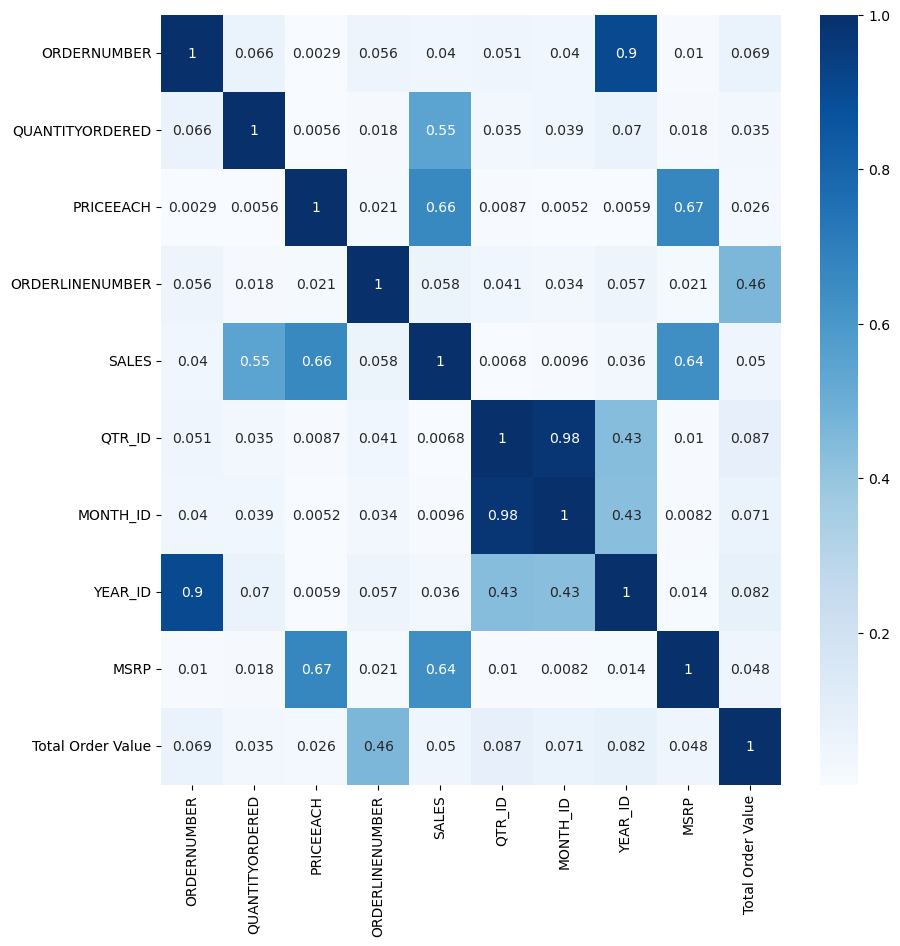

In [34]:
# plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(sales_numerical.corr().abs(), annot=True, cmap='Blues')


In [35]:
# c.Export a dataset to a CSV file using Python or any other similar programming tool.

#Preprocessed sales data saved in onedrive.
clean_data = sales.to_csv('Sales_updated.csv')

#Display saved data location
%pwd

'C:\\Users\\ajupe\\OneDrive - New Zealand Skills & Education Group\\GDDA7123C\\GD604_Data Collection and Analysis\\Assessment-2'

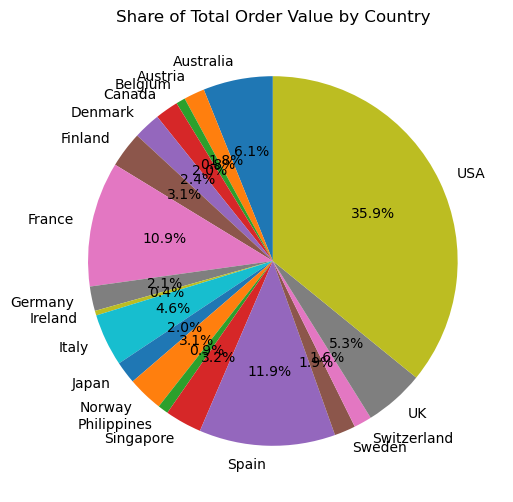

In [36]:
# d.Perform data analysis and visualization 

total_order_country = sales.groupby('COUNTRY')['Total Order Value'].sum()

# Plotting the pie chart
plt.figure(figsize=(8,6))
plt.pie(total_order_country, labels=total_order_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Order Value by Country')
plt.show()

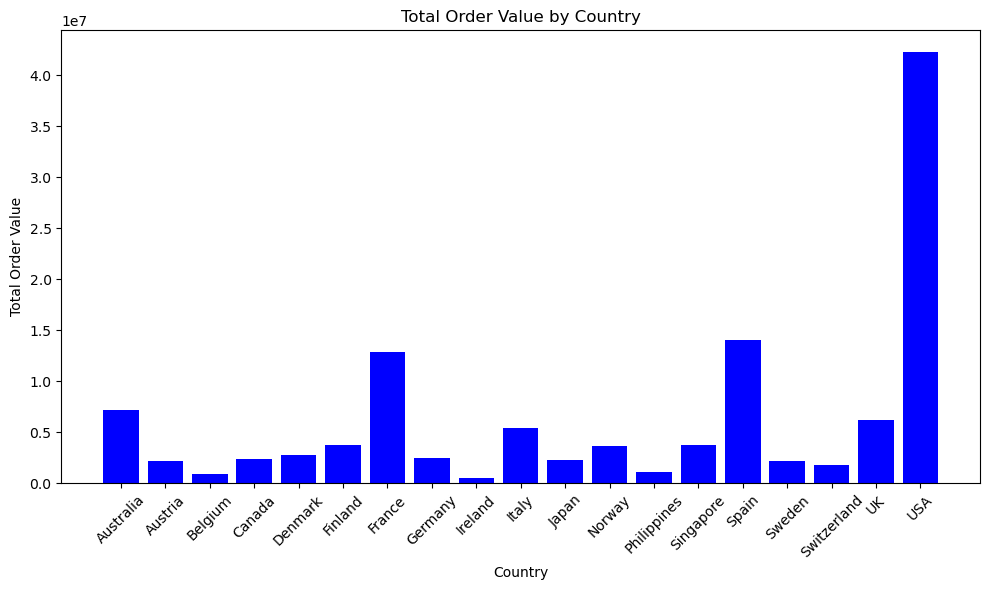

In [37]:
# Plotting the bar graph
total_order_country = sales.groupby('COUNTRY')['Total Order Value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(total_order_country.index, total_order_country, color='blue')
plt.title('Total Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlations with Total Order Value:
Total Order Value    1.000000
ORDERLINENUMBER      0.459295
QTR_ID               0.087389
MONTH_ID             0.070532
SALES                0.049626
MSRP                 0.047981
QUANTITYORDERED      0.035097
PRICEEACH            0.025710
ORDERNUMBER         -0.068636
YEAR_ID             -0.082295
Name: Total Order Value, dtype: float64


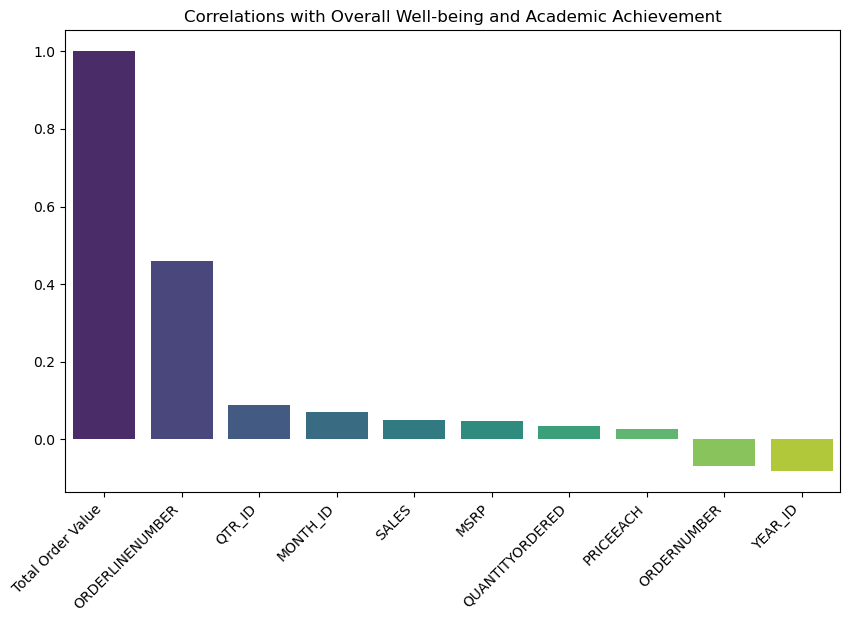

In [38]:
# Calculate correlation matrix
correlation_matrix = sales_numerical.corr()
satisfaction_correlations = correlation_matrix['Total Order Value'].sort_values(ascending=False)
# Display the correlations
print("Correlations with Total Order Value:")
print(satisfaction_correlations)
# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_correlations.index, y=satisfaction_correlations.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Correlations with Overall Well-being and Academic Achievement")
plt.show()

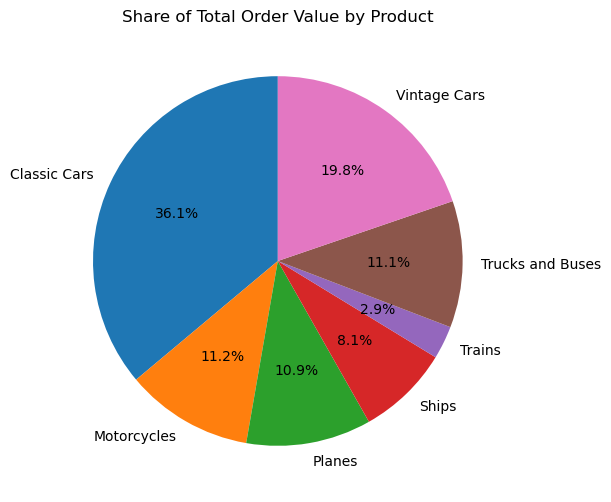

In [39]:
#Total Order Value by Product
total_order_product = sales.groupby('PRODUCTLINE')['Total Order Value'].sum()

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(total_order_product, labels=total_order_product.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Order Value by Product')
plt.show()

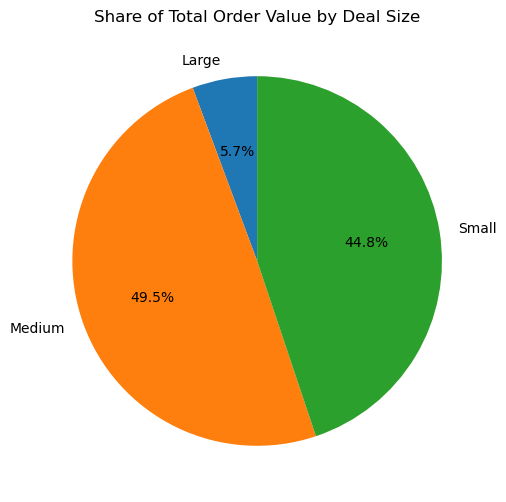

In [40]:
#Share of Total Order Value by Deal Size
deal_size = sales.groupby('DEALSIZE')['Total Order Value'].sum()

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(deal_size, labels=deal_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Order Value by Deal Size')
plt.show()

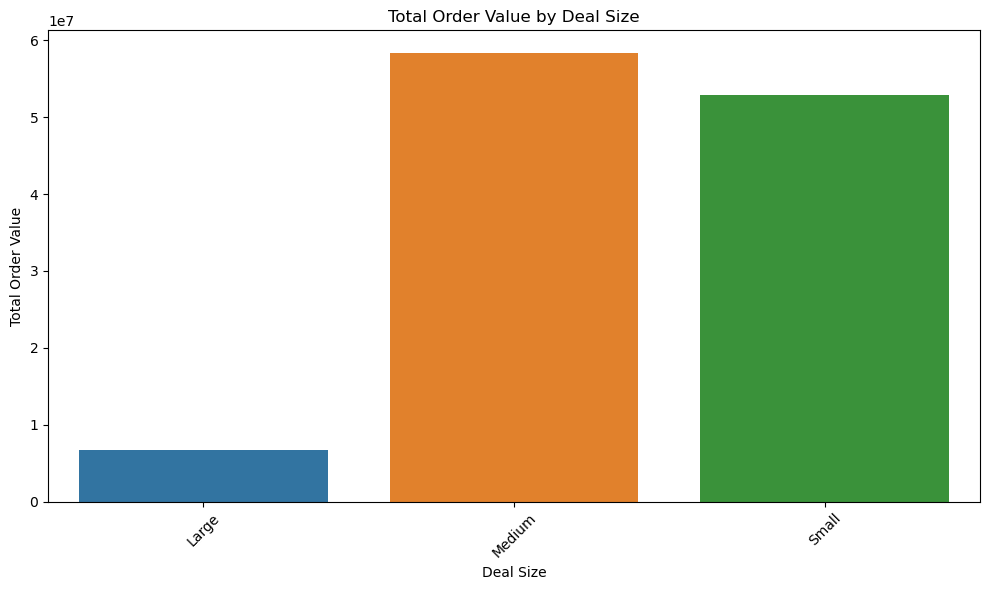

In [41]:
#plotting the bar chart
deal_sum = sales.groupby('DEALSIZE')['Total Order Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DEALSIZE', y='Total Order Value', data=deal_sum)
plt.title('Total Order Value by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

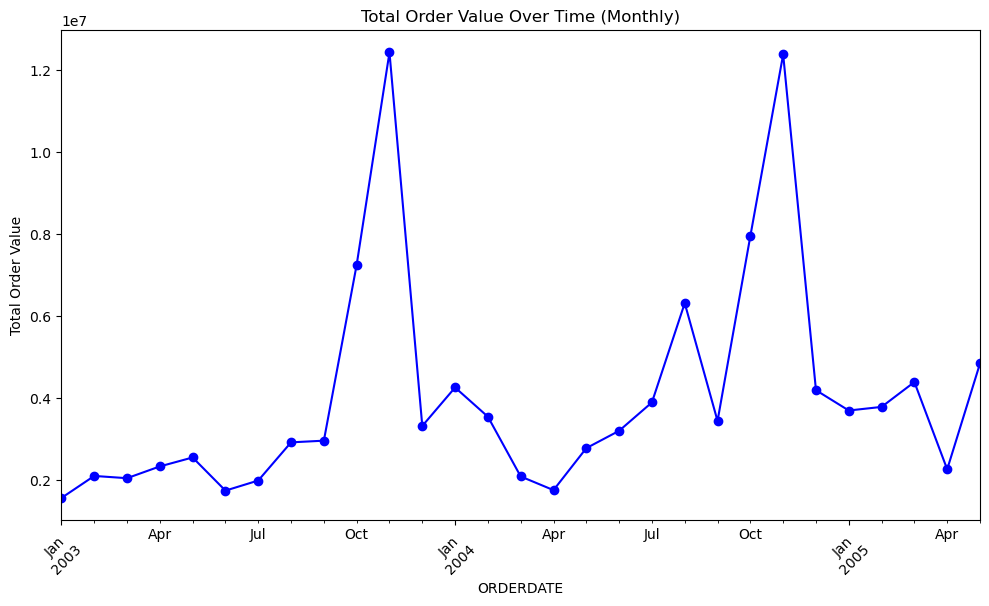

In [42]:
# Plotting the monthly sales data

sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])

#filtering dates to monthly sales
monthly_sales = sales.resample('M', on='ORDERDATE')['Total Order Value'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-', color='blue')
plt.title('Total Order Value Over Time (Monthly)')
plt.ylabel('Total Order Value')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

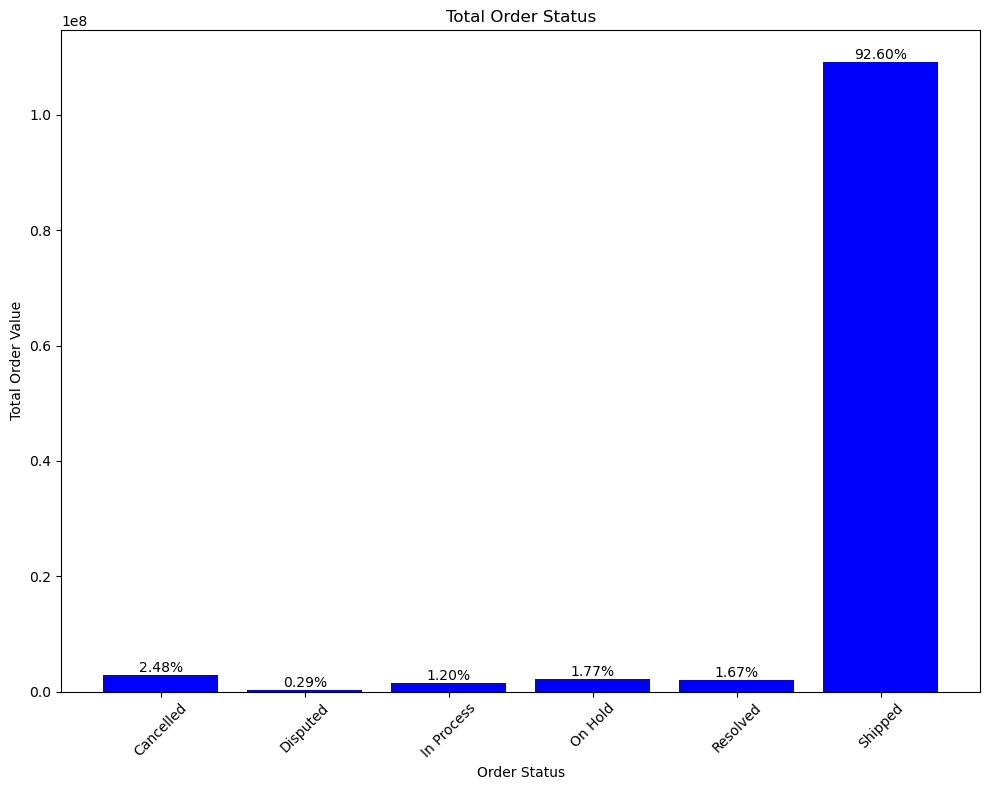

In [43]:
# Plotting the bar graph
order_status = sales.groupby('STATUS')['Total Order Value'].sum()

plt.figure(figsize=(10, 8))
bars = plt.bar(order_status.index, order_status, color='blue')

plt.title('Total Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)
plt.tight_layout()

total = order_status.sum()
for bar in bars:
    percentage = (bar.get_height() / total) * 100 
    label = "{:.2f}%".format(percentage) 
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', va='bottom')
plt.show()

In [44]:
canceled_orders = sales[sales['STATUS'] == 'Cancelled']

#Set 'ORDERDATE' as the index
canceled_orders['ORDERDATE'] = pd.to_datetime(canceled_orders['ORDERDATE'])
canceled_orders.set_index('ORDERDATE', inplace=True)

# Resample to retrive the monthly count of canceled orders
monthly_canceled_orders = canceled_orders.resample('M').size()

# result
print(len(monthly_canceled_orders))
print(monthly_canceled_orders)

9
ORDERDATE
2003-10-31    16
2003-11-30     0
2003-12-31     0
2004-01-31     0
2004-02-29     0
2004-03-31     0
2004-04-30     0
2004-05-31    14
2004-06-30    30
Freq: ME, dtype: int64


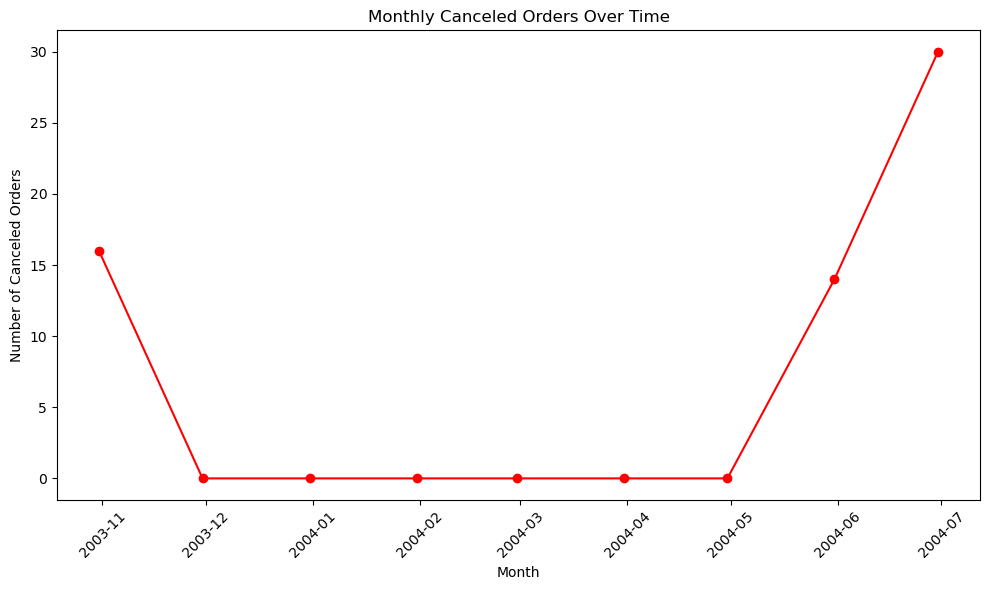

In [45]:
import matplotlib.pyplot as plt

# Plotting the monthly count of canceled orders
plt.figure(figsize=(10, 6))
plt.plot(monthly_canceled_orders.index, monthly_canceled_orders.values, marker='o', linestyle='-', color='red')
plt.title('Monthly Canceled Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Canceled Orders')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

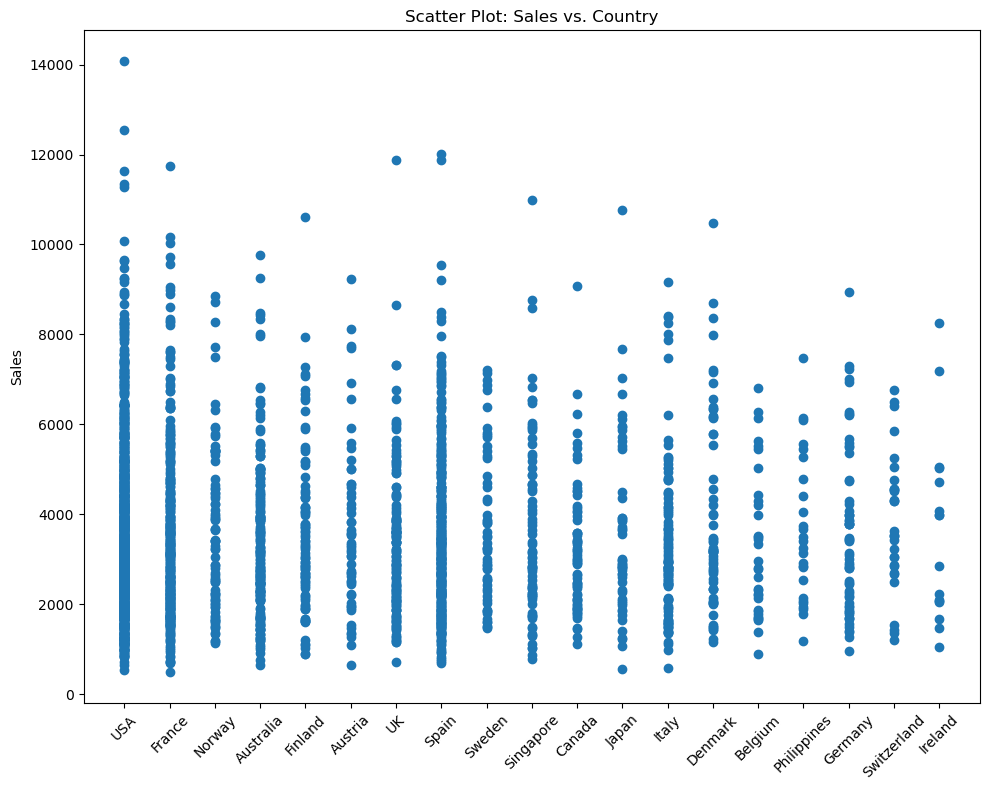

In [46]:
#scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(sales['COUNTRY'], sales['SALES'])
plt.title('Scatter Plot: Sales vs. Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,Total Order Value
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,25783.76
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small,18971.96
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium,25624.88
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,55776.12
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,62498.29


**e) Infernal statical method to quantify the relationships between variables.**

In [48]:
#Relationship between 'Country' and 'Dealsize'
from scipy.stats import chi2_contingency
 
contingency_table = pd.crosstab(sales['COUNTRY'], sales['DEALSIZE'])

chi2, p, _, _ = chi2_contingency(contingency_table)
# Print the results
print(f"Chi-square Value: {chi2}")
print(f"P-value: {p}")

# Interpret the results based on the p-value
alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Conclusion:")

if p < alpha:
    print("Reject the null hypothesis. There is a significant relation between the COUNTRY and DEALSIZE")
else:
    print("Fail to reject the null hypothesis. There is no significant relation between the COUNTRY and DEALSIZE")

Chi-square Value: 32.244780506142035
P-value: 0.6478727539969273

Significance level (alpha): 0.05
Conclusion:
Fail to reject the null hypothesis. There is no significant relation between the COUNTRY and DEALSIZE


In [58]:
from scipy import stats
# Calculating the overall mean sales value
overall_m_sales = sales['SALES'].mean()

# Filtering for canceled orders
canceled_orders = sales[sales['STATUS'] == 'Cancelled']

# filtering the sales values of canceled orders
canceled_sales_values = canceled_orders['SALES']

#t-test
t_stat, p_value = stats.ttest_1samp(canceled_sales_values, overall_m_sales)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpreting the result
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the mean sales value of canceled orders compared to the overall mean.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean sales value of canceled orders compared to the overall mean.")

T-statistic: nan, P-value: nan
Fail to reject the null hypothesis. There is no significant difference in the mean sales value of canceled orders compared to the overall mean.


In [50]:
#Anova test
from scipy import stats
grouped = sales.groupby('PRODUCTLINE')

sales_data = [group['SALES'].values for name, group in grouped]
# Performing the ANOVA test
anova_result = stats.f_oneway(*sales_data)

print(f"ANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.2f}")

# print the result
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis - There is a significant difference between the mean sales of different product lines.")
else:
    print("Fail to reject the null hypothesis - There is  no significant difference between the mean sales of different product lines.")

ANOVA test result: F-statistic = 25.23, p-value = 0.00
Reject the null hypothesis - There is a significant difference between the mean sales of different product lines.


In [51]:
# dropping unwanted colums('CUSTOMERNAME', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID','YEAR_ID')
sales = sales.drop(['CUSTOMERNAME', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID','YEAR_ID'], axis=1)

In [52]:
#LabelEncoding
from sklearn import preprocessing

#Convert category to numeric value
columns_encode = ['PRODUCTLINE',
                  'COUNTRY', 'DEALSIZE',
                  'Total Order Value',
                  'STATUS'
                 ] 

label_encoder = preprocessing.LabelEncoder()

for column in columns_encode:
    sales[column] = label_encoder.fit_transform(sales[column])
    
selected_column = sales[columns_encode]

sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,Total Order Value
0,10107,30,95.70,2871.00,2003-02-24,5,1,95,18,2,110
1,10121,34,81.35,2765.90,2003-05-07,5,1,95,6,2,82
2,10134,41,94.74,3884.34,2003-07-01,5,1,95,6,1,109
3,10145,45,83.26,3746.70,2003-08-25,5,1,95,18,1,274
4,10159,49,100.00,5205.27,2003-10-10,5,1,95,18,1,295


In [53]:
sales.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,Total Order Value
ORDERNUMBER,1.000000,0.065543,-0.002935,0.039919,0.983053,-0.159024,-0.004473,-0.010280,-0.031549,-0.018528,-0.055983
QUANTITYORDERED,0.065543,1.000000,0.005564,0.551426,0.058166,-0.038014,-0.007752,0.017881,0.053100,-0.476389,0.032201
PRICEEACH,-0.002935,0.005564,1.000000,0.657841,-0.004508,-0.000165,-0.130841,0.670625,-0.009626,-0.630426,0.022337
SALES,0.039919,0.551426,0.657841,1.000000,0.033568,-0.004828,-0.160354,0.635239,0.022396,-0.862814,0.041736
ORDERDATE,0.983053,0.058166,-0.004508,0.033568,1.000000,-0.162251,0.002025,-0.012820,-0.020865,-0.009128,-0.045327
STATUS,-0.159024,-0.038014,-0.000165,-0.004828,-0.162251,1.000000,-0.032708,0.021370,-0.037485,0.016109,-0.033415
PRODUCTLINE,-0.004473,-0.007752,-0.130841,-0.160354,0.002025,-0.032708,1.000000,-0.279994,0.002697,0.136536,-0.095993
MSRP,-0.010280,0.017881,0.670625,0.635239,-0.012820,0.021370,-0.279994,1.000000,-0.002597,-0.580248,0.042136
COUNTRY,-0.031549,0.053100,-0.009626,0.022396,-0.020865,-0.037485,0.002697,-0.002597,1.000000,-0.031803,0.076398
DEALSIZE,-0.018528,-0.476389,-0.630426,-0.862814,-0.009128,0.016109,0.136536,-0.580248,-0.031803,1.000000,-0.025794


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'ORDERNUMBER'),
  Text(1.5, 0, 'QUANTITYORDERED'),
  Text(2.5, 0, 'PRICEEACH'),
  Text(3.5, 0, 'SALES'),
  Text(4.5, 0, 'ORDERDATE'),
  Text(5.5, 0, 'STATUS'),
  Text(6.5, 0, 'PRODUCTLINE'),
  Text(7.5, 0, 'MSRP'),
  Text(8.5, 0, 'COUNTRY'),
  Text(9.5, 0, 'DEALSIZE'),
  Text(10.5, 0, 'Total Order Value')])

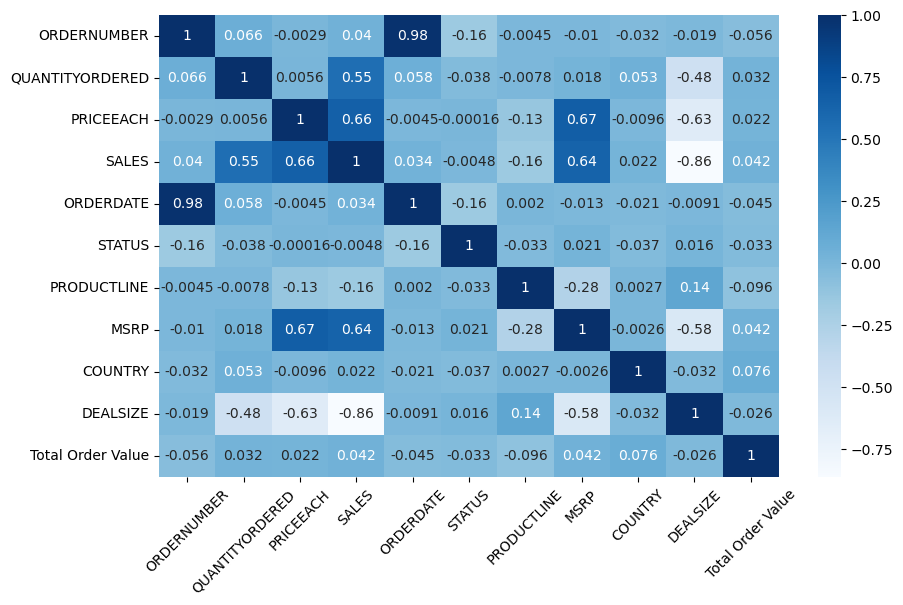

In [54]:
#plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sales.corr(), cmap = 'Blues', annot = True)
plt.xticks(rotation=45)

In [55]:
sales.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,Total Order Value
0,10107,30,95.70,2871.0,2003-02-24,5,1,95,18,2,110
1,10121,34,81.35,2765.9,2003-05-07,5,1,95,6,2,82


In [56]:
#e) applied multiple linear method to quantify the relationships between variables.

In [57]:
#LinearRegression
from sklearn.linear_model import LinearRegression
# independent variables ('QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DEALSIZE')
# dependent variable ('SALES')
X = sales[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DEALSIZE']]  # Independent variables
y = sales['SALES']  # Dependent variable

# model creation
model = LinearRegression()

# fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [   66.42170211    22.4769234     10.39000222 -1270.53400547]
Intercept: 73.00081125292127
